In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fonctions 

## 1. initialisation  
### n[p] = nombre de neurones dans la couche p
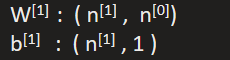 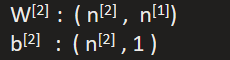 

In [2]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
# parametres utiles pour Forward-Propagation
    return parametres

## 2. Forward-Propagation
### 1ere Couche de neurones : 
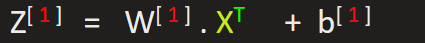  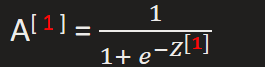
### Couches suivantes de neurones
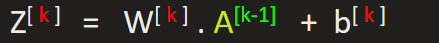  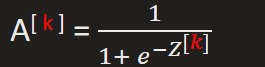


In [12]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }  
# retourne un dict des Ai utilisable en back-propagation

    return activations  

## Bac-Propagation = Descente de Gradients
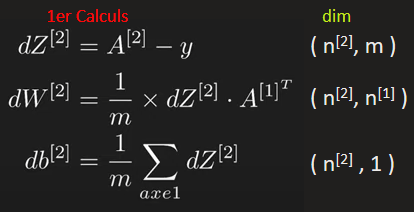
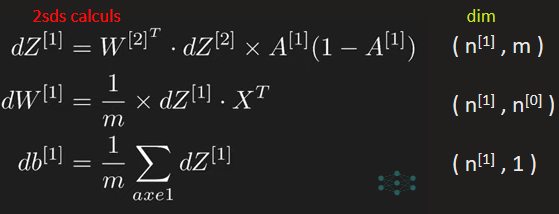

In [4]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)
# db2 = somme des colonnes de dZ2
# keepdims très important pour garder dim db2(n[2], 1)
# sinon sans keepdims => dim db2(n[2],)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
# gradients utiles pour mise à jour Wt+1    
    return gradients

In [5]:
def update(gradients, parametres, learning_rate):
    # on charge les 1ers parametres
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    # on calcule les gradients des param
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    # on met à jour les params par alpha et grad
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    # on écrase param par la mise à jour
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [6]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
# on prend le dictionnaire activation 'A1' et 'A2'
  A2 = activations['A2']
# A2 = dico['key']
  return A2 >= 0.5
# retourne True si A2 >= 0.5 sinon retourne False

In [7]:
def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]     # nbre de variables dans X, shape[0] car transposée
    n2 = y.shape[0]     # idem pour y
    # n1 = nbre de neurones dans la 1ere couche, définit en param de def n1 = 32
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)  # donne notre dico de params d'initialisation

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres) # forward-propagation
        A2 = activations['A2']                           # qui retourne des activations

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)  # back-propagation qui retourne des gradients
        parametres = update(gradients, parametres, learning_rate)    # mise à jour des gradients


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

# Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


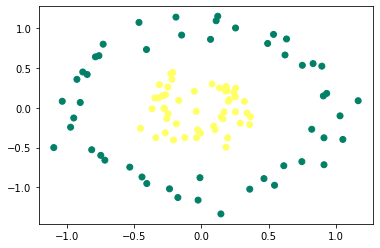

In [8]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T                           # on transpose X pour la formule à plusieurs neurones
y = y.reshape((1, y.shape[0]))    # idem on transpose y en invertissant le reshape ( commence par 1 )

print('dimensions de X:', X.shape)  # -> X(2, 100) et y(1, 100)  pour vérifier
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')  # scatter aussi transposé en prenant ligne 0 + toutes colonnes puis ligne 1 et toutes colonnes
plt.show()  

100%|██████████| 1000/1000 [00:03<00:00, 305.83it/s]


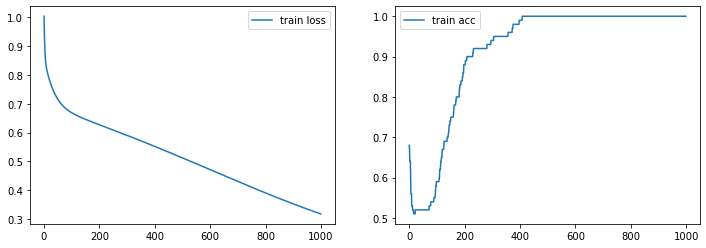

{'W1': array([[ 1.80212588,  0.37821374],
        [ 1.01147118,  2.72196966],
        [ 2.58920092, -1.12112355],
        [ 1.0508304 , -0.23999551],
        [-0.32911352,  0.61126472],
        [ 0.10449739,  1.5211303 ],
        [ 0.90568599,  0.00334079],
        [ 0.44974817,  0.32479341],
        [ 2.19228574, -0.55199865],
        [ 0.07362119, -0.72521454],
        [-2.55294805,  0.64962759],
        [ 0.79621311, -0.67148306],
        [ 2.47060832, -1.49806086],
        [-0.08319614, -0.07417017],
        [ 1.61979578,  1.66597748],
        [ 0.1398299 ,  0.38577941],
        [-1.5500226 , -2.61344251],
        [-0.19459163,  0.0227914 ],
        [ 1.3320316 ,  1.1949539 ],
        [-0.71462983, -0.02385873],
        [-1.23999647, -2.47955126],
        [-2.07311228,  2.57822617],
        [-0.31829059, -0.65082684],
        [-1.46140776,  0.96926358],
        [-2.59100928, -0.09863181],
        [-0.78361708,  0.24660244],
        [-0.63362911, -1.18964448],
        [ 0.17256072, 

In [9]:
neural_network(X, y, n1=32)

100%|██████████| 1000/1000 [00:01<00:00, 545.85it/s]


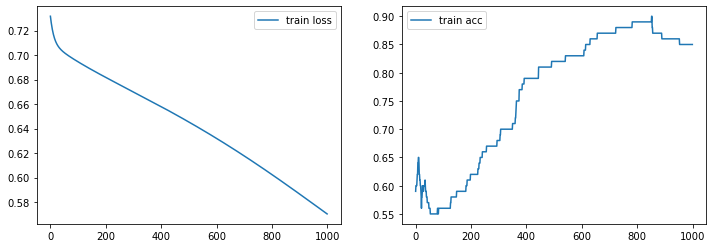

In [10]:
parametres = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1)